# **Convolutional Neural Networks (Advanced Building Blocks)**

Apart from convolutions, advanced CNN architecture are composed of different types of building blocks. In the following, we illustrate the most standard ones already implemented as Modules in PyTorch.

## Activation Functions

Different types of activation functions applied to all the elements in a given tensor

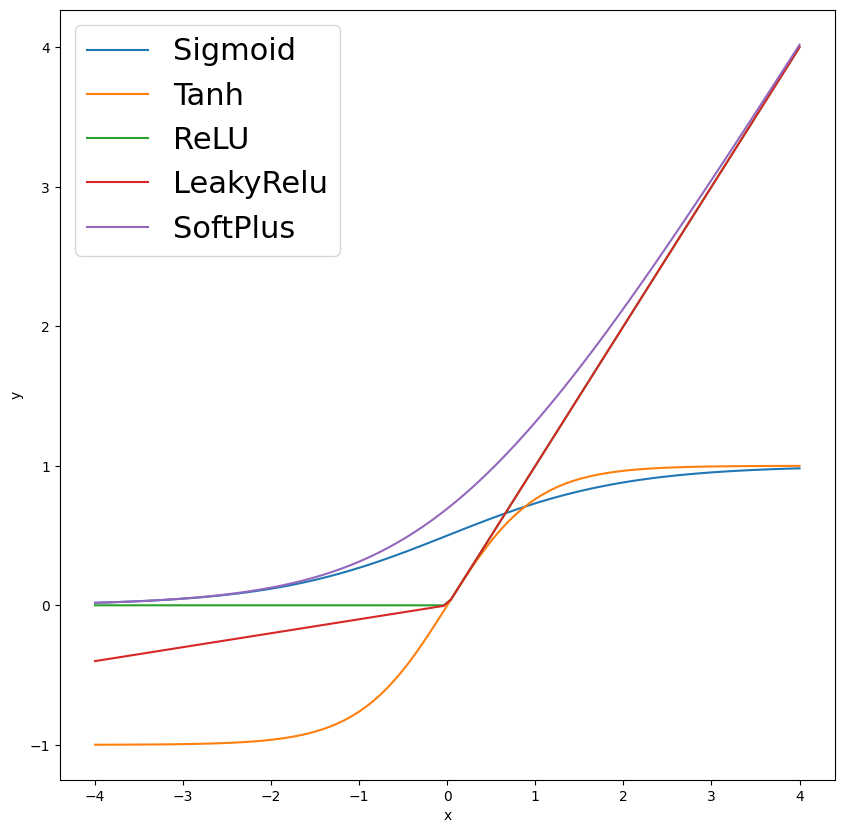

In [1]:
# Initialize and apply different activation functions implemented in PyTorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x = torch.from_numpy( np.linspace(-4,4,100))
plt.figure(figsize=(10,10))

# Sigmoid -> 1 / (1+exp(-x)) -> [0,1]
act = nn.Sigmoid()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='Sigmoid')

# Tanh -> Hyperbolic Tangent -> [-1,1]
act = nn.Tanh()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='Tanh')

# ReLU -> max(0,x)  -> [0,Inf]
act = nn.ReLU()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='ReLU')

# LeakyRelu - max(x*neg_slope,x)  -> [-Inf,Inf]
act = nn.LeakyReLU(negative_slope=0.1)
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='LeakyRelu')

# SoftPlus -> log(1+exp(x)) -> [0,Inf]
act = nn.Softplus()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='SoftPlus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=22)

## Normalization Layers

Different types of normalization layers ( InstanceNorm and BatchNorm). Both layers normalize the tensor channels to have zero mean and unit standard deviation as:

$y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$,

where, $\beta,\gamma$ are learnable paramters.

They differ on how the expectation and std. deviation are computed. In InstanceNorm, they are computed independently for each channel and sample. In contrast, BatchNorm computes the expectation and std. dev. of each channel but across all the samples. Additionally, BatchNorm stores the expectation and std. dev. during training in order to use it in testing.



In [2]:
# Normlization Layers examples
num_channels = 2
num_samples = 2
x = torch.randn(num_samples,num_channels,5,5) # two 5x5 tensors with 2 channels

# Layer Normalization modules
instance_norm = nn.InstanceNorm2d(num_channels) 
batch_norm = nn.BatchNorm2d(num_channels) 

# Apply Instance Normalization
inst_norm_y = instance_norm(x)
inst_norm_y = inst_norm_y.view(num_samples,num_channels,-1)
print('-- Instance Normalization --')
print('Mean of samples and channels:')
print(inst_norm_y.mean(axis=2).squeeze().numpy())
print('Std. dev. of samples and channels:')

print(inst_norm_y.std(axis=2).squeeze().numpy())
batch_norm_y = batch_norm(x)
batch_norm_y = batch_norm_y.permute(1,0,2,3).reshape(num_channels,-1)

print('\n -- Batch Normalization -- ')
print('Channel mean accross samples:')
print(batch_norm_y.mean(axis=1).squeeze().detach().numpy())
print('Channel std. dev. accross samples:')
print(batch_norm_y.std(axis=1).squeeze().detach().numpy())


-- Instance Normalization --
Mean of samples and channels:
[[ 0.0000000e+00 -2.3841857e-09]
 [ 2.3841858e-08 -4.7683715e-09]]
Std. dev. of samples and channels:
[[1.0206169 1.0206159]
 [1.0206149 1.0206156]]

 -- Batch Normalization -- 
Channel mean accross samples:
[-2.3841858e-08 -4.7683715e-09]
Channel std. dev. accross samples:
[1.0101484 1.0101478]


## Pooling Layers

Different types of spatial pooling operators. They are used to decrease the spatial resolution of tensors and, thus, increase the receptive field of subsequent layers.

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


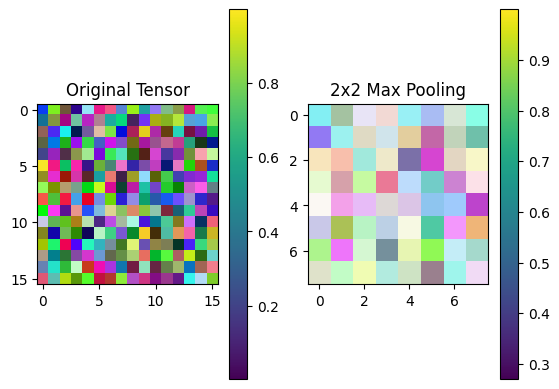

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 4, 4])


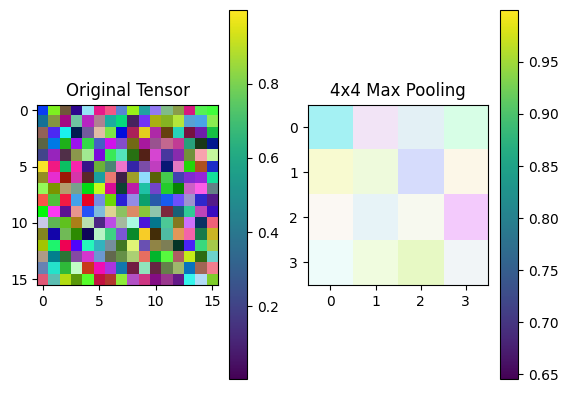

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


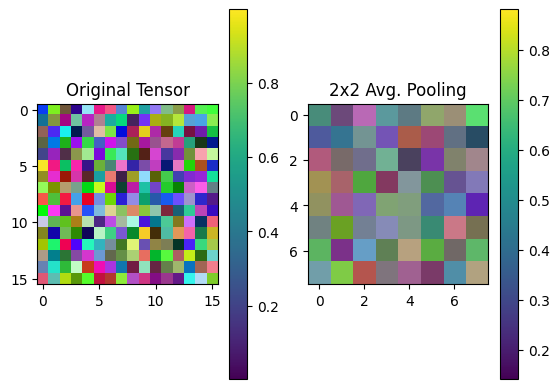

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


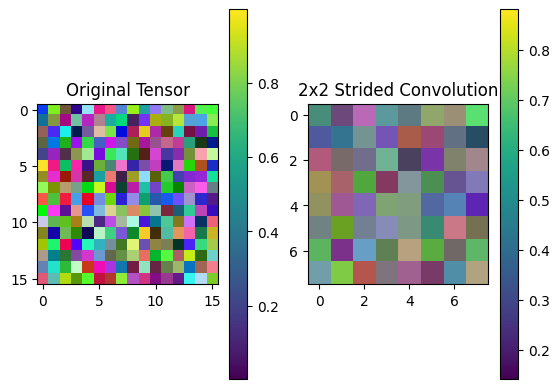

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# random image
x = torch.rand(3,16,16)

### MAX POOOLING ( Take the maximum of a window centered in each pixel - It is applied for each channel independently
###                Distance between windows is defined by stride

# Apply 2x2 Max Pooling (Divide spatial resolution by two)
window_size = 2
distance_btw_windows = 2
pooling = nn.MaxPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Max Pooling')
plt.show()

# Apply 4x4 Max Pooling (Divide spatial resolution by 4)
window_size = 4
distance_btw_windows = 4
pooling = nn.MaxPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('4x4 Max Pooling')
plt.show()


### Average POOOLING ( Take the average of a window centered in each pixel. It is applied for each channel independently
###                Distance between windows is defined by stride)

# Apply 2x2 Average. Pooling (Divide spatial resolution by two)
window_size = 2
distance_btw_windows = 2
pooling = nn.AvgPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Avg. Pooling')
plt.show()

### Strided Convolution ( Spatial Reoslution can also be reduced by using strided convolutions. In this case, the
                          # convolution will not be applied to all spatial locations but every n pixels (defined by stride paramter)

# Reduce spatial resolution by two with strided convolution
stride = 2
conv_pool = nn.Conv2d(3,3,3,stride=stride)

y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Strided Convolution')
plt.show()

# **Convolutional Neural Networks (Advanced Architectures)**
In the following, we illustrate the key ideas behind popular Convolutional Neural Architectures.

## 1 VGG Network : https://arxiv.org/pdf/1409.1556.pdf.
Key idea : just go bigger and deeper

In [4]:
class VGGSim(nn.Module):
    def __init__(self, num_classes=10):
        
        super(VGGSim, self).__init__()
        
        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1)
        
        self.fc = nn.Linear(8*8*128, num_classes)
        
        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        
        out = self.relu(self.conv11(x))
        out = self.relu(self.conv12(out))
        out = self.maxpool(out)
        
        out = self.relu(self.conv21(out))
        out = self.relu(self.conv22(out))
        out = self.maxpool(out)
        
        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out



## 2 Inception https://arxiv.org/abs/1409.4842
Key idea : Network in Network to learn multiple resolution features (parallel convolutions with different kernel sizes whose result is combined)

In [5]:
class IncSim(nn.Module):
    def __init__(self, num_classes=10):
        
        super(IncSim, self).__init__()
        
        self.conv11 = nn.Conv2d(3, 64, kernel_size=1, stride=2, padding=0)
        self.conv12 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.conv13 = nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=2)
        
        self.conv21 = nn.Conv2d(192, 128, kernel_size=1, stride=2, padding=0)
        self.conv22 = nn.Conv2d(192, 128, kernel_size=3, stride=2, padding=1)
        self.conv23 = nn.Conv2d(192, 128, kernel_size=5, stride=2, padding=2)
        
        self.fc = nn.Linear(8*8*384, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        
        #Inc 1 
        out11 = self.relu(self.conv11(x))
        out12 = self.relu(self.conv12(x))
        out13 = self.relu(self.conv13(x))
        
        out1a = [out11, out12, out13]
        out1a = torch.cat(out1a,dim=1)
        
        #Inc 12
        out21 = self.relu(self.conv21(out1a))
        out22 = self.relu(self.conv22(out1a))
        out23 = self.relu(self.conv23(out1a))
        
        out2a = [out21, out22, out23]
        out2a = torch.cat(out2a,1)
        
        out = out2a.view(out2a.size(0), -1)
        out = self.fc(out)
        
        return out

## 3  Resnet :https://arxiv.org/abs/1512.03385 
Key idea : Adding skip connection to let gradient flow directly to previous input. 

In [6]:
#use torch to make standard cnn 
class ResSim(nn.Module):
    def __init__(self, num_classes=10):
        
        super(ResSim, self).__init__()
        
        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv21 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        
        self.fc = nn.Linear(8*8*64, num_classes)
        
        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        
        out11 = self.relu(self.conv11(x))
        out12 = self.relu(self.conv12(out11)) + out11 # Residual connection 1

        out = self.maxpool(out12)

        out21 = self.relu(self.conv21(out)) 
        out = self.relu(self.conv22(out21)) + out21 # Residual connection 2
        out = self.maxpool(out)
        
        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out
    


# **Training and testing advanced architectures on SVHN**
We are going to test/train the previous advanced architectures on the SVHN dataset.

## SVHN Dataset and DataLoader

In [7]:
## Create SVHN database

# All the data will be loaded from the provided file in Data/mnist.t
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2023/P3/Data/'
results_path = '/content/drive/My Drive/DeepLearning_2023/P3/Results/'

#Making native class loader
class SVHN(torch.utils.data.Dataset):
    # Initialization method for the dataset
    def __init__(self,dataDir = data_path+'/svhn/train_32x32.mat',transform = None):
        mat_loaded = sio.loadmat(dataDir)
        self.data = mat_loaded['X']
        self.labels = mat_loaded['y'].squeeze()
        self.labels -= self.labels.min()
        self.transform = transform
     # What to do to load a single item in the dataset ( read image and label)    
    def __getitem__(self, index):
        data = self.data[:,:,:,index]
        lbl = self.labels[index]
        
        data = Image.fromarray(data)
        # Apply a trasnformaiton to the image if it is indicated in the initalizer
        if self.transform is not None : 
            data = self.transform(data)
        
        # return the image and the label
        return data,lbl
    
        pass
    
    # Return the number of images
    def __len__(self):
        return self.data.shape[3]

# Create train data loader
tr = tf.Compose([
        tf.ToTensor(), 
        tf.Normalize(mean = [.5], std = [.5])
        ])
SVHNTrain = SVHN(data_path+'/svhn/train_32x32.mat',tr)
train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain,
                                               batch_size=256, 
                                               shuffle=True)

Mounted at /content/drive


## Define Train and Test Functions

In [8]:
# Train function
def train(CNN, train_loader, optimizer, num_epochs=5, model_name='model.ckpt', device='cpu'):
    CNN.train() # Set the model in train mode
    total_step = len(train_loader)
    losses_list = []
    criterion = nn.CrossEntropyLoss()
    # Iterate over epochs
    for epoch in range(num_epochs):
        # Iterate the dataset
        loss_avg = 0
        nBatches = 0
        for i, (images, labels) in enumerate(train_loader):
            # Get batch of samples and labels
            images = images.to(device)
            labels = labels.type(torch.LongTensor).to(device)

            # Forward pass
            outputs = CNN(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_avg += loss.cpu().item()
            nBatches+=1
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        losses_list.append(loss_avg / nBatches)
        torch.save(CNN.state_dict(), results_path+ '/' + model_name)
          
    return losses_list 

# Test funcion
def test(CNN, test_loader):
  with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # get network predictions
            outputs = CNN(images)

            # get predicted class
            _, predicted = torch.max(outputs.data, 1)

            # compare with the ground-truth
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # return accuracy
        return 100 * correct / total

## Train advanced architectures on SVHN

In [9]:
#Train Vgg
vgg = VGGSim()

#Initialize optimizer 
learning_rate = .1
optimizer = torch.optim.SGD(vgg.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
vgg = vgg.to(device)

losses_list = train(vgg, train_loader, optimizer, num_epochs=10, model_name='vgg_svhn.ckpt', device=device)


Epoch [1/10], Step [100/287], Loss: 2.2417
Epoch [1/10], Step [200/287], Loss: 1.9880
Epoch [1/10], Step [287/287], Loss: 1.5730
Epoch [2/10], Step [100/287], Loss: 0.4870
Epoch [2/10], Step [200/287], Loss: 0.4638
Epoch [2/10], Step [287/287], Loss: 0.4480
Epoch [3/10], Step [100/287], Loss: 0.3685
Epoch [3/10], Step [200/287], Loss: 0.3654
Epoch [3/10], Step [287/287], Loss: 0.3614
Epoch [4/10], Step [100/287], Loss: 0.3259
Epoch [4/10], Step [200/287], Loss: 0.3243
Epoch [4/10], Step [287/287], Loss: 0.3213
Epoch [5/10], Step [100/287], Loss: 0.2858
Epoch [5/10], Step [200/287], Loss: 0.2878
Epoch [5/10], Step [287/287], Loss: 0.2933
Epoch [6/10], Step [100/287], Loss: 0.2655
Epoch [6/10], Step [200/287], Loss: 0.2674
Epoch [6/10], Step [287/287], Loss: 0.2717
Epoch [7/10], Step [100/287], Loss: 0.2452
Epoch [7/10], Step [200/287], Loss: 0.2495
Epoch [7/10], Step [287/287], Loss: 0.2541
Epoch [8/10], Step [100/287], Loss: 0.2215
Epoch [8/10], Step [200/287], Loss: 0.2339
Epoch [8/10

In [10]:
#Train Inception
inception = IncSim()

#Initialize optimizer 
learning_rate = .1
optimizer = torch.optim.SGD(inception.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
inception = inception.to(device)

losses_list = train(inception, train_loader, optimizer, num_epochs=10, model_name='inception_svhn.ckpt', device=device)

Epoch [1/10], Step [100/287], Loss: 1.6369
Epoch [1/10], Step [200/287], Loss: 1.1951
Epoch [1/10], Step [287/287], Loss: 1.0305
Epoch [2/10], Step [100/287], Loss: 0.6047
Epoch [2/10], Step [200/287], Loss: 0.5852
Epoch [2/10], Step [287/287], Loss: 0.5709
Epoch [3/10], Step [100/287], Loss: 0.4892
Epoch [3/10], Step [200/287], Loss: 0.4991
Epoch [3/10], Step [287/287], Loss: 0.4964
Epoch [4/10], Step [100/287], Loss: 0.4510
Epoch [4/10], Step [200/287], Loss: 0.4452
Epoch [4/10], Step [287/287], Loss: 0.4473
Epoch [5/10], Step [100/287], Loss: 0.4217
Epoch [5/10], Step [200/287], Loss: 0.4173
Epoch [5/10], Step [287/287], Loss: 0.4218
Epoch [6/10], Step [100/287], Loss: 0.3815
Epoch [6/10], Step [200/287], Loss: 0.3884
Epoch [6/10], Step [287/287], Loss: 0.3960
Epoch [7/10], Step [100/287], Loss: 0.3664
Epoch [7/10], Step [200/287], Loss: 0.3780
Epoch [7/10], Step [287/287], Loss: 0.3793
Epoch [8/10], Step [100/287], Loss: 0.3497
Epoch [8/10], Step [200/287], Loss: 0.3588
Epoch [8/10

In [11]:
#Train ResNet
resnet = ResSim()

#Initialize optimizer 
learning_rate = .1
optimizer = torch.optim.SGD(resnet.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet = resnet.to(device)

losses_list = train(resnet, train_loader, optimizer, num_epochs=10, model_name='resnet_svhn.ckpt', device=device)

Epoch [1/10], Step [100/287], Loss: 1.6895
Epoch [1/10], Step [200/287], Loss: 1.1959
Epoch [1/10], Step [287/287], Loss: 1.0071
Epoch [2/10], Step [100/287], Loss: 0.5338
Epoch [2/10], Step [200/287], Loss: 0.5185
Epoch [2/10], Step [287/287], Loss: 0.5040
Epoch [3/10], Step [100/287], Loss: 0.4789
Epoch [3/10], Step [200/287], Loss: 0.4638
Epoch [3/10], Step [287/287], Loss: 0.4577
Epoch [4/10], Step [100/287], Loss: 0.4167
Epoch [4/10], Step [200/287], Loss: 0.4169
Epoch [4/10], Step [287/287], Loss: 0.4125
Epoch [5/10], Step [100/287], Loss: 0.3870
Epoch [5/10], Step [200/287], Loss: 0.3818
Epoch [5/10], Step [287/287], Loss: 0.3835
Epoch [6/10], Step [100/287], Loss: 0.3690
Epoch [6/10], Step [200/287], Loss: 0.3690
Epoch [6/10], Step [287/287], Loss: 0.3689
Epoch [7/10], Step [100/287], Loss: 0.3672
Epoch [7/10], Step [200/287], Loss: 0.3655
Epoch [7/10], Step [287/287], Loss: 0.3690
Epoch [8/10], Step [100/287], Loss: 0.3345
Epoch [8/10], Step [200/287], Loss: 0.3428
Epoch [8/10

## Evaluate advanced architectures

In [12]:
# Show results for all the trained models
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

SVHNTest = SVHN(data_path+'/svhn/test_32x32.mat',tr)
test_loader = torch.utils.data.DataLoader(dataset=SVHNTest,
                                               batch_size=256, 
                                               shuffle=True)

#
vgg = VGGSim()
vgg.load_state_dict(torch.load(results_path + 'vgg_svhn.ckpt'))
vgg.cuda()
acc = test(vgg, test_loader)
print('Accuracy Vgg: ' + str(acc))
#
inception = IncSim()
inception.load_state_dict(torch.load(results_path + 'inception_svhn.ckpt'))
inception.cuda()
acc = test(inception, test_loader)
print('Accuracy Inception: ' + str(acc))
#
resnet = ResSim()
resnet.load_state_dict(torch.load(results_path + 'resnet_svhn.ckpt'))
resnet.cuda()
acc = test(resnet, test_loader)
print('Accuracy ResNet: ' + str(acc))

Accuracy Vgg: 89.7241856177013
Accuracy Inception: 85.79824830977259
Accuracy ResNet: 87.52688998156115


# **Transfer Learning**
State-of-the-art CNNs tipycally require a large number of samples to be trained effectively. However, in many cases we only have access to a small dataset to solve our problem. In this cases, we can use transfer learning strategies. In particular, we can pre-train a model with a large dataset somewhat directly with our problem and, then, finetune the model for a small number of epochs with the target small database.

## Example on SVHN
In this case, we have a training set 'tl_train_9_10_32x32.mat' containing 200 samples of 0s and 9s. We want to build a binary classifier predicting this two classes. As we will see, if we train directly using this small dataset, the performance will be very low. To address this, we will pre-train our CNN with another dataset 'tl_train_32x32.mat' containing a large number of samples with digits from 1 to 8. 

After that, we will fine-tune the last layer of the pre-trained model with the 9-0s small dataset and compute the accuracy over the test set: 'tl_test_9_10_32x32.mat'

## Initialize DataLoaders for Transfer Learning experiment

In [13]:
# Big dataset with numbers from 1 to 8
SVHNTrain_TL = SVHN(data_path+'/svhn_tl/tl_train_32x32.mat',tr)
tl_train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain_TL,
                                               batch_size=256, 
                                               shuffle=True)

# 200 samples of 0s and 9s
SVHNTrain_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_train_9_10_32x32.mat',tr)
tl_train_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTrain_TL_0_9,
                                                  batch_size=64, 
                                                  shuffle=True)
# Test dataset with 0 and 9s
SVHNTest_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_test_9_10_32x32.mat',tr)
tl_test_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTest_TL_0_9,
                                                  batch_size=64, 
                                                  shuffle=True)



## Training a ResNet from Scratch
Here we show how training from scratch using only the small dataset leads to poor performance.

In [14]:
#Train ResNet
resnet_tl_scratch = ResSim(num_classes=2)
#Initialize optimizer 
learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl_scratch.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl_scratch = resnet_tl_scratch.to(device)
# Train
train(resnet_tl_scratch, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_resnet_scratch_svhn.ckpt', device=device)
acc = test(resnet_tl_scratch, tl_test_loader_0_9)
print('Accuracy ResNet Scratch: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 0.6929
Epoch [2/20], Step [4/4], Loss: 0.6991
Epoch [3/20], Step [4/4], Loss: 0.6864
Epoch [4/20], Step [4/4], Loss: 0.6809
Epoch [5/20], Step [4/4], Loss: 0.6744
Epoch [6/20], Step [4/4], Loss: 0.6868
Epoch [7/20], Step [4/4], Loss: 0.6706
Epoch [8/20], Step [4/4], Loss: 0.6584
Epoch [9/20], Step [4/4], Loss: 0.6651
Epoch [10/20], Step [4/4], Loss: 0.6367
Epoch [11/20], Step [4/4], Loss: 0.6358
Epoch [12/20], Step [4/4], Loss: 0.6224
Epoch [13/20], Step [4/4], Loss: 0.6338
Epoch [14/20], Step [4/4], Loss: 0.6552
Epoch [15/20], Step [4/4], Loss: 0.5646
Epoch [16/20], Step [4/4], Loss: 0.5896
Epoch [17/20], Step [4/4], Loss: 0.5696
Epoch [18/20], Step [4/4], Loss: 0.5325
Epoch [19/20], Step [4/4], Loss: 0.4904
Epoch [20/20], Step [4/4], Loss: 0.4424
Accuracy ResNet Scratch: 60.34867651748698


## Pre-train a ResNet with the big dataset with numbers from 1 to 8

In [15]:
#Train ResNet
resnet_tl = ResSim(num_classes=8)
#Initialize optimizer 
learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)
# Train
losses_it = train(resnet_tl, tl_train_loader, optimizer, num_epochs=20, model_name='tl_resnet_svhn.ckpt', device=device)


Epoch [1/20], Step [100/249], Loss: 1.9833
Epoch [1/20], Step [200/249], Loss: 1.5412
Epoch [1/20], Step [249/249], Loss: 1.3602
Epoch [2/20], Step [100/249], Loss: 0.5454
Epoch [2/20], Step [200/249], Loss: 0.5177
Epoch [2/20], Step [249/249], Loss: 0.5070
Epoch [3/20], Step [100/249], Loss: 0.4198
Epoch [3/20], Step [200/249], Loss: 0.4227
Epoch [3/20], Step [249/249], Loss: 0.4178
Epoch [4/20], Step [100/249], Loss: 0.3815
Epoch [4/20], Step [200/249], Loss: 0.3748
Epoch [4/20], Step [249/249], Loss: 0.3739
Epoch [5/20], Step [100/249], Loss: 0.3502
Epoch [5/20], Step [200/249], Loss: 0.3421
Epoch [5/20], Step [249/249], Loss: 0.3393
Epoch [6/20], Step [100/249], Loss: 0.3230
Epoch [6/20], Step [200/249], Loss: 0.3242
Epoch [6/20], Step [249/249], Loss: 0.3185
Epoch [7/20], Step [100/249], Loss: 0.2924
Epoch [7/20], Step [200/249], Loss: 0.2928
Epoch [7/20], Step [249/249], Loss: 0.2952
Epoch [8/20], Step [100/249], Loss: 0.2819
Epoch [8/20], Step [200/249], Loss: 0.2824
Epoch [8/20

# Fine-tune only the last layer of the pretrained network with the small dataset of 9s and 0s

In [16]:
resnet_tl = ResSim(num_classes=8)
resnet_tl.load_state_dict(torch.load(results_path + 'tl_resnet_svhn.ckpt'))

resnet_tl.fc = nn.Linear(8*8*64, 2)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl.fc.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)

train(resnet_tl, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_resnet_finetuned_svhn.ckpt', device=device)
acc = test(resnet_tl, tl_test_loader_0_9)
print('Accuracy ResNet Transfer Learning: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 3.1961
Epoch [2/20], Step [4/4], Loss: 4.1362
Epoch [3/20], Step [4/4], Loss: 4.9326
Epoch [4/20], Step [4/4], Loss: 0.5915
Epoch [5/20], Step [4/4], Loss: 1.6840
Epoch [6/20], Step [4/4], Loss: 0.7955
Epoch [7/20], Step [4/4], Loss: 0.3721
Epoch [8/20], Step [4/4], Loss: 0.3747
Epoch [9/20], Step [4/4], Loss: 0.1369
Epoch [10/20], Step [4/4], Loss: 0.1755
Epoch [11/20], Step [4/4], Loss: 0.0191
Epoch [12/20], Step [4/4], Loss: 0.0389
Epoch [13/20], Step [4/4], Loss: 0.0099
Epoch [14/20], Step [4/4], Loss: 0.0001
Epoch [15/20], Step [4/4], Loss: 0.0000
Epoch [16/20], Step [4/4], Loss: 0.0001
Epoch [17/20], Step [4/4], Loss: 0.0001
Epoch [18/20], Step [4/4], Loss: 0.0001
Epoch [19/20], Step [4/4], Loss: 0.0001
Epoch [20/20], Step [4/4], Loss: 0.0001
Accuracy ResNet Transfer Learning: 91.29371744445626
